# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset represents 17 marketing campaigns conducted by the Portugese banking institution.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Based on the description provided, some of the features include 'unknown' values which can be missing or unclassified values:

&nbsp;&nbsp;&nbsp;&nbsp;**age** (numeric): no missing values mentioned. Type is set correctly <br>

&nbsp;&nbsp;&nbsp;&nbsp;**job** (categorical): Feature includes 'unknown' category which might indicate missing or unclassified values <br>

&nbsp;&nbsp;&nbsp;&nbsp;**marital** (categorical): Feature includes 'unknown' category which might indicate missing or unclassified values <br>

&nbsp;&nbsp;&nbsp;&nbsp;**education** (categorical): Feature includes 'unknown' category which might indicate missing or unclassified values <br>

&nbsp;&nbsp;&nbsp;&nbsp;**default** (categorical): Feature includes 'unknown' category which might indicate missing or unclassified values <br>

&nbsp;&nbsp;&nbsp;&nbsp;**housing** (categorical): Feature includes 'unknown' category which might indicate missing or unclassified values <br>

&nbsp;&nbsp;&nbsp;&nbsp;**loan** (categorical): Feature includes 'unknown' category which might indicate missing or unclassified values <br>

&nbsp;&nbsp;&nbsp;&nbsp;**contact** (categorical): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**month** (categorical): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**day_of_week** (categorical): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**duration** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**campaign** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**pdays** (numeric): No missing values mentioned. '999' is a placeholder which indicates the client has not been contacted previously.

&nbsp;&nbsp;&nbsp;&nbsp;**previous** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**poutcome** (numeric): No missing values mentioned, but 'nonexistant' is a specific value indicting no prior outcome

&nbsp;&nbsp;&nbsp;&nbsp;**emp.var.rate** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**cons.price.idx** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**cons.conf.idx** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**euribor3m** (numeric): No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**nr.employed** (numeric) No missing values mentioned

&nbsp;&nbsp;&nbsp;&nbsp;**y** (binary categorical): No missing values mentioned


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Business Objective

The objective of this taks is to compare the perfromance of multiple machine learning classifiers: K-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines - to predict whether a client will subscribe to a term deposit based on their demographic information, past interactions and economic indicators. By analyzing the results the bank aims to imporve its marketing strategies by identifying the key factors that influence a customer's decision and increase the success rate of marketing campaigns. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Features to be encoded:
    
    - age (numeric)
    - job (categorical)
    - marital (categorical)
    - education (categorical)
    - default (categorical)
    - housing (categorical)
    - loan (categorical)
    
Target:

    - y (binary categorical: 'yes', 'no')

### Handling 'unknown' Values

In categorical features like job, marital, education, default, housing, and loan, the 'unknown' category will be replaced with the most frequent category in that feature. For simplicity, 'unknown' will be treated as a separate category.

### Data Normalization/Standardization
Using Standardization (z-score normalization) to scale the 'age' numeric feature to ensure it does not dominate the model.


In [6]:
# Select features and target
features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
target = df['y']

# Define the preprocessing steps
numeric_features = ['age']
numeric_transformer = StandardScaler()

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Encode the target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Create a preprocessing and modeling pipeline (can add a model here later)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the transformations
X_prepared = pipeline.fit_transform(features)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, target_encoded, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Establishing the baseline performance using the most frequent class (majority class) in the target variable. 

### Steps to Calculate the Baseline Accuracy:

1. Determine the most frequent class: Identify which class ('yes' or 'no') is the most frequent in the target variable. <br>


2. Calculate the baseline accuracy: Divide the number of occurences of the most frequent class by the total number of instances in the dataset, to compute accuracy. 

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
target_counts = dict(zip(unique, counts))

# Since 'yes' and 'no' are encoded as 1 and 0 respectively, we'll map these back to their original labels
target_labels = {0: 'no', 1: 'yes'}

# Print the counts
print(f"Count of 'no' values: {target_counts[0]}")
print(f"Count of 'yes' values: {target_counts[1]}")

Count of 'no' values: 29245
Count of 'yes' values: 3705


In [9]:
# Calculate the baseline accuracy
baseline_accuracy = np.sum(y_train == np.bincount(y_train).argmax()) / len(y_train)

# np.bincount(y_train).argmax() - Finds the most frequent class in the y_train array
# np.sum(y_train == most_frequent_class) - Count how many times the most frequent class appears in y_train
# baseline_accuracy - This is the accuracy of the model that always predicts the most frequent class

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8876


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [10]:
# Create the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Logistic Regression Model Accuracy: 0.8865
Confusion Matrix:
[[7303    0]
 [ 935    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



### Accuracy
    - The model achieves an accuracy of 88.65%
    
### Confusion Matrix

    - The confusion matrix shows that the model predicts all instances as the majority class (0 for 'no)
    - True Negatives (7303): The model predicted 'no' for 7303 cases which is correct
    - False Positives (0): There are no false positives, which means the model never predicted 'yes' incorrectly when the actual value was 'no'
    - False Negatives (935): The model predicted 'no' for all 935 instances where the actual value was a 'yes'
    - True Positives (0): The model failed to correctly predict any instances of 'yes'
    
### Classification Report

**Precision, Recall, and F1-Score for Class '1' ('yes')**: All are 0.00, which means that the model failed to identify any 'yes' instances correctly.

**Precision for Class '0' ('no')**: Precision is 0.89 which means the model predicted 'no' and it was correct 89% of the time

**Recall for Class '0' ('no')**: The recall is 1, which means the model correctly identified all 'no' instances

The model is biased because the majority class ('no') far outweighs the 'yes' class and this causes an imbalance. The model predicts 'no' for every instance and never predicts 'yes'.

The model has not learned to correctly identify the minority class ('yes') and this leads to 0 precision. 

### Problem 9: Score the Model

What is the accuracy of your model?

Based on the results from step 8 (above), the accuracy is 88.65%. This means that 88.65% of the predictions made by the model were correct when compared to the values in the test dataset. This result is driven mainly by the number of majority class ('no') values in the dataset.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Create an empty list to store the results
results_list = []

# Loop through the models
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    results_list.append({
        'Model': model_name,
        'Train Time': f"{train_time:.4f} seconds",
        'Train Accuracy': f"{train_accuracy:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}"
    })

# Convert the results list to a DataFrame
results = pd.DataFrame(results_list)

# Display the results
print(results)


                    Model       Train Time Train Accuracy Test Accuracy
0     Logistic Regression   0.2594 seconds         0.8876        0.8865
1     K-Nearest Neighbors   0.0022 seconds         0.8897        0.8738
2           Decision Tree   0.4221 seconds         0.9166        0.8617
3  Support Vector Machine  39.8834 seconds         0.8882        0.8867


1. **Logistic Regression**:

    **Train Time**: Fast<br>
    **Train Accuracy**: 88.76% - good fit, with minimal overfitting<br>
    **Test Accuracy** 88.65% - very close to the train accuracy, good generalization to unseen data<br>
    <br>
2. **K-Nearest Neighbors (KNN)**:

    **Train Time**: Very fast<br>
    **Train Accuracy**: 88.97% - good fit, slightly higher than Logistic Regression<br>
    **Test Accuracy** 87.38% - lower than Logistic Regression which indicates there might be some overfitting<br>
<br>
3. **Decision Tree**:

    **Train Time**: Slightly slower than Logistic Regression and KNN<br>
    **Train Accuracy**: 91.66% - higher accuracy than the Logistic Regression and KNN models. Potential overfitting<br>
    **Test Accuracy** 86.17% - lower than Logistic Regression and KNN which confirms there is overfitting<br>
<br>
4. **Support Vector Machine (SVM)**:
    
    **Train Time**: Slow<br>
    **Train Accuracy**: 88.82%, very close to the Logistin Regression accuracy<br>
    **Test Accuracy**: 88.67%, higher than Logistic Regression, strong generalization and a longer training time<br>

The best model for generalization: Logistic Regression and SVM have similar performance but Logistic Regression has a much faster training time. 

The Decision Tree model shows signs of overfitting because of the drop in test accuracy compared to train accuracy. 

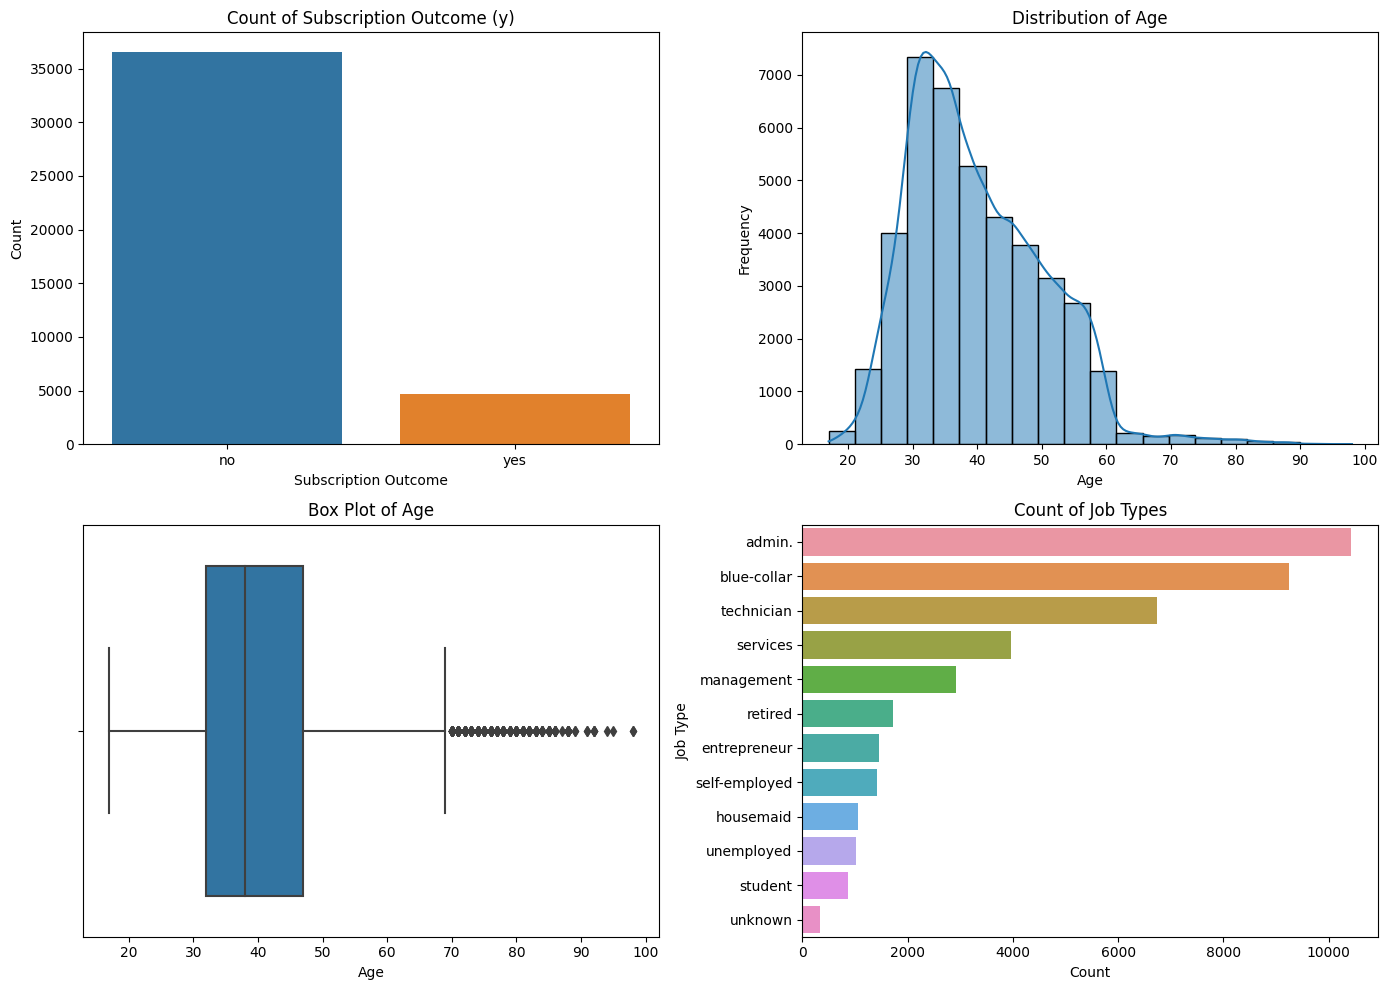

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Categorical Plot: Count plot for the target variable 'y'
sns.countplot(x='y', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count of Subscription Outcome (y)')
axes[0, 0].set_xlabel('Subscription Outcome')
axes[0, 0].set_ylabel('Count')

# 2. Continuous Plot: Histogram for the 'age' variable
sns.histplot(df['age'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# 3. Continuous Plot: Box plot for the 'age' variable to visualize outliers
sns.boxplot(x='age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Age')
axes[1, 0].set_xlabel('Age')

# 4. Categorical Plot: Count plot for the 'job' variable
sns.countplot(y='job', data=df, ax=axes[1, 1], order=df['job'].value_counts().index)
axes[1, 1].set_title('Count of Job Types')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Job Type')

# Adjust the layout for better readability
plt.tight_layout()

# Display the plots
plt.show()


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?

When considering whether to include the gender feature in a predictive model, it is important to weigh both the potential benefits and risks. 

**Pros of using the Gender Feature:**<br>
<br>
    1. Improved predictive power:
    
    If gender has significant correlation with the target variable, incliding it can improve the model's accuracy. Certain products may appeal differently to different genders.
    
    Gender can be useful when targeting different groups with different products. 
    
    2. Understanding customer behaviour: 
    
    Gender can provide insights into how different groups reposnd to offers, products and services. 
    
**Cons of using the Gender Feature:**
    
    1. Risk of Bias and Discrimination:
    
    If the model makes decisions based on gender, it can lead to discriminatory practices, such as offering different terms to different genders.
    
    2. Regulatory Legal Risks:
    
    In many countries, using gender in decision-making models, especially in areas like lending, hiring, or insurance may be subject to legal restrictions. 
    
    Including gender might add complexity to the model without and significant improvements. 
    

### Hyperparameter tuning and grid search

Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Define the Hyperparameter Grids

**K-Nearest Neighbors(KNN)**<br>

**n_neighbors**: Number of neighbors to consider<br>
**weights**: Whether to weight the neighbors uniformly or by distance<br>
**metric**: The distance metric to use<br>
<br>
**Decision Tree**
<br>

**max_depth**: The maximum depth of the tree<br>
**min_samples_split**: The minimum number of samples required to split an internal node<br>
**min_samples_leaf**: The minimum number of samples required to be a leaf node

**Support Vector Machine (SVM)**<br>

**C**: Regularization parameter<br>
**kernel**: Kernel type to be used<br>
**gamma**: Kernel coefficient for rbf, poly or sigmoid. 



In [17]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}


In [18]:
# Initialize RandomizedSearchCV for KNN with fewer iterations
knn_random_search = RandomizedSearchCV(KNeighborsClassifier(),
                                       knn_param_grid, n_iter=5, cv=3, 
                                       scoring='accuracy', n_jobs=-1, random_state=42)

# Initialize RandomizedSearchCV for Decision Tree with fewer iterations
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                      dt_param_grid, n_iter=5, cv=3, 
                                      scoring='accuracy', n_jobs=-1, random_state=42)

# Initialize RandomizedSearchCV for SVM with fewer iterations
svm_random_search = RandomizedSearchCV(SVC(random_state=42), 
                                       svm_param_grid, n_iter=5, cv=3, 
                                       scoring='accuracy', n_jobs=-1, random_state=42)



In [20]:
# Fit the random search for KNN
knn_random_search.fit(X_train, y_train)

# Fit the random search for Decision Tree
dt_random_search.fit(X_train, y_train)

# Fit the random search for SVM
svm_random_search.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy versio

RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1], 'gamma': ['scale'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy')

In [21]:
# Best parameters and accuracy for KNN
print(f"Best parameters for KNN: {knn_random_search.best_params_}")
print(f"Best accuracy for KNN: {knn_random_search.best_score_}")

# Evaluate on test data
knn_best_model = knn_random_search.best_estimator_
knn_test_accuracy = knn_best_model.score(X_test, y_test)
print(f"Test accuracy for KNN: {knn_test_accuracy}")

# Best parameters and accuracy for Decision Tree
print(f"Best parameters for Decision Tree: {dt_random_search.best_params_}")
print(f"Best accuracy for Decision Tree: {dt_random_search.best_score_}")

# Evaluate on test data
dt_best_model = dt_random_search.best_estimator_
dt_test_accuracy = dt_best_model.score(X_test, y_test)
print(f"Test accuracy for Decision Tree: {dt_test_accuracy}")

# Best parameters and accuracy for SVM
print(f"Best parameters for SVM: {svm_random_search.best_params_}")
print(f"Best accuracy for SVM: {svm_random_search.best_score_}")

# Evaluate on test data
svm_best_model = svm_random_search.best_estimator_
svm_test_accuracy = svm_best_model.score(X_test, y_test)
print(f"Test accuracy for SVM: {svm_test_accuracy}")


Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 5, 'metric': 'euclidean'}
Best accuracy for KNN: 0.875781452794567
Test accuracy for KNN: 0.8737557659626123
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best accuracy for Decision Tree: 0.8850682565169411
Test accuracy for Decision Tree: 0.8855304685603301
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best accuracy for SVM: 0.8875569041934791
Test accuracy for SVM: 0.8865015780529255


### Interpretation of the Hyperparameter Tuning Results

#### 1. K-Nearest Neighbors (KNN):

**Best Parameters:**

    weights: uniform - All neighbors are weighted equally
    n_neighbors: 5 - The model considers 5 nearest neighbors
    metric: euclidean - Euclidean distance is used to measure the distance between points. 
    
**Best Cross-Validation Accuracy:**

    0.8758 - Average accuracy during the cross validation process with the best parameters
    
**Test Accuracy:**

    0.8738 - The accuracy of the KNN model on the test dataset - results are very close to the cross-validation
    accuracy. This means that the model generalizes well and there is no significant overfitting.
    
#### 2. Decision Tree

**Best Parameters:**
    
    min_samples_split: 5 - A node must have at least 5 samples to be considered for splitting
    min_samples_leaf: 1 - A leaf node must have at least 1 sample
    max_depth: 10 - The maximum depth of the tree is limited to 10 levels
    
**Best Cross-Validation Accuracy:**

    0.8851 - is the average accuracy during cross-validation with the best parameters
    
**Test Accuracy:**

    0.8855 - accuracy of the Decision Tree model on the test dataset. It is very close to the cross-validation accuracy. 
    
#### 3. Support Vector Machine (SVM)

**Best Parameters**

    kernel: 'linear' - A linear kernel is used
    gamma: 'scale' - This is a default setting that scales the kernel coefficient
    C: 0.1 - A low regularization parameter value
    
**Best Cross-Validation Accuracy:**
    
    0.8876 - This is the average accuracy during cross-validation with the best parameters

**Test Accuracy:**

    0.8865 - The accuracy of the SVM model on the test dataset
    
    
The three models performed well, with test accuracies between 87-88%. The SVM model had the highest test accuracy at 88.65%, and it was closely followed by the Decision Tree and KNN models.

##### Questions